# Project Title - Video Game Sales

This dataset was obtained from www.kaggle.com and it contains the information about various games that were released in past few decades. By analysing this dataset with pandas, numpy, matplotlib and seaborn, we will figure out things like Most popular genre, Top publishers, Top Platforms, Top selling games in different regions etc. If I am able to do this basic analysis, it's thanks to this course. (https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas)

## Downloading the Dataset

Dataset was downloaded from www.kaggle.com using opendatasets mode for Python

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/gregorut/videogamesales'
od.download(dataset_url, force = True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sagarpartap
Your Kaggle Key: ········


100%|██████████| 381k/381k [00:00<00:00, 111MB/s]

Let's begin by downloading the data, and listing the files within the dataset.

The dataset has been downloaded and extracted.

In [4]:
data_dir = './videogamesales'

In [5]:
import os
os.listdir(data_dir)

['vgsales.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "video_game_sales" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sagarpartap-che18/video-game-sales" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sagarpartap-che18/video-game-sales


'https://jovian.ai/sagarpartap-che18/video-game-sales'

## Data Preparation and Cleaning

We will find any null values and drop the corresponding rows.



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

In [11]:
videogames_df = pd.read_csv(data_dir + '/vgsales.csv')
videogames_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [12]:
videogames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### It seems like 'Year' and 'Publisher' columns contain null values


In [15]:
videogames_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### Remove the rows where Year and Publisher is unknown

In [18]:
videogames_df = videogames_df[videogames_df.Year.notnull()]
videogames_df = videogames_df[videogames_df['Publisher'].notnull()]
videogames_df.isnull().any()

Rank            False
Name            False
Platform        False
Year            False
Genre           False
Publisher       False
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [21]:
videogames_df.shape

(16291, 11)

In [22]:
videogames_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### None of columns contain values that are out of bounds.

In [23]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sagarpartap-che18/video-game-sales" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sagarpartap-che18/video-game-sales


'https://jovian.ai/sagarpartap-che18/video-game-sales'

## Exploratory Analysis and Visualization

We will visualise things like Most popular Genre among publishers, most games produced by year, Top 10 publishers, top 10 Platforms, most selling regions



In [32]:
sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
videogames_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

## Total no. of games produced by each Genre


In [71]:
groups = videogames_df['Genre'].value_counts()
groups

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

<AxesSubplot:ylabel='Genre'>

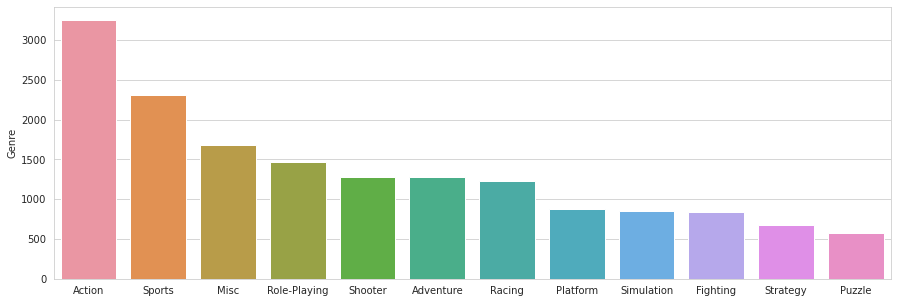

In [70]:
sns.barplot(y=videogames_df['Genre'].value_counts(),x =videogames_df['Genre'].value_counts().index)

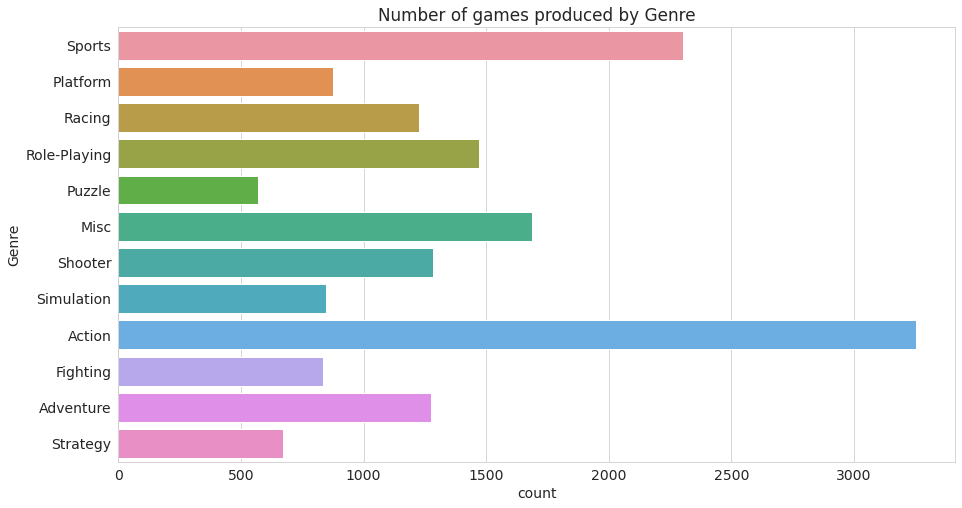

In [25]:
plt.figure(figsize=(15, 8))
plt.title('Number of games produced by Genre')
ax = sns.countplot(y = videogames_df.Genre)

## Most selling region

In [39]:
total_JP_sales = videogames_df.JP_Sales.sum()
total_NA_sales = videogames_df.NA_Sales.sum()
total_EU_sales = videogames_df.EU_Sales.sum()
total_other_sales = videogames_df.Other_Sales.sum()
regions = ['Japan', 'North America', 'Europe', 'Others']
region_sales = [total_JP_sales, total_NA_sales, total_EU_sales, total_other_sales]

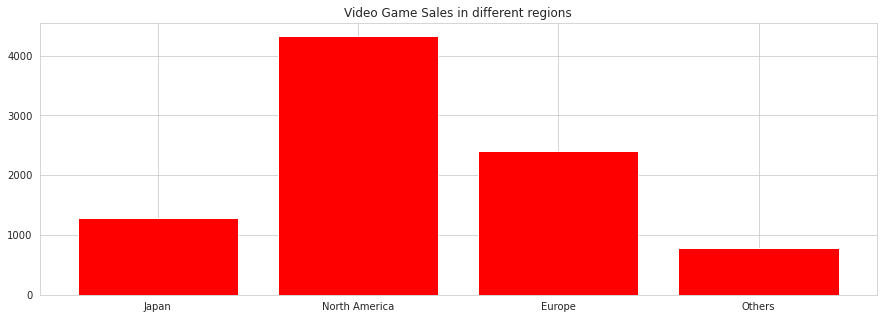

In [40]:
plt.title('Video Game Sales in different regions')
plt.bar(regions, region_sales, color = 'red');

## Total number of Games published by year

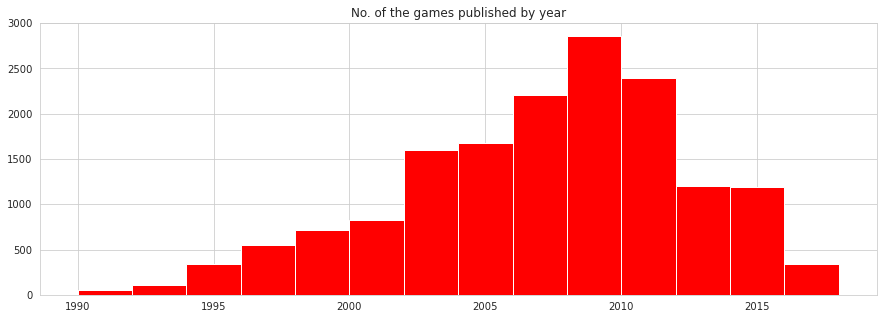

In [58]:
plt.title('No. of the games published by year')
plt.hist(videogames_df.Year, bins = np.arange(1990,2020,2), color = 'red');

## Top 10 publishers

In [112]:
top_ten_publishers = videogames_df['Publisher'].value_counts().head(10)
top_ten_publishers

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

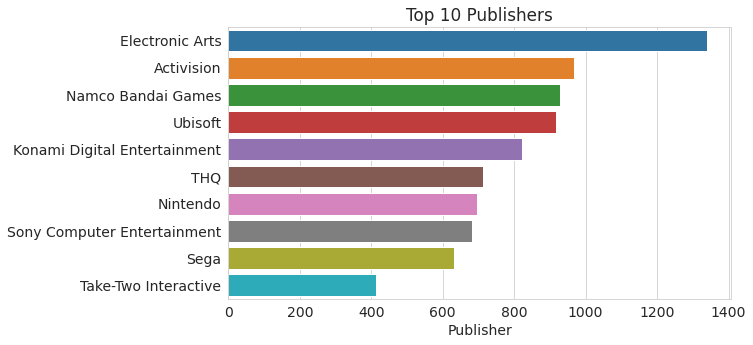

In [113]:
plt.title('Top 10 Publishers')
sns.barplot(x = top_ten_publishers, y = top_ten_publishers.index);

## Top 10 platforms

In [72]:
top_ten_platforms = videogames_df['Platform'].value_counts().head(10)
top_ten_platforms

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
Name: Platform, dtype: int64

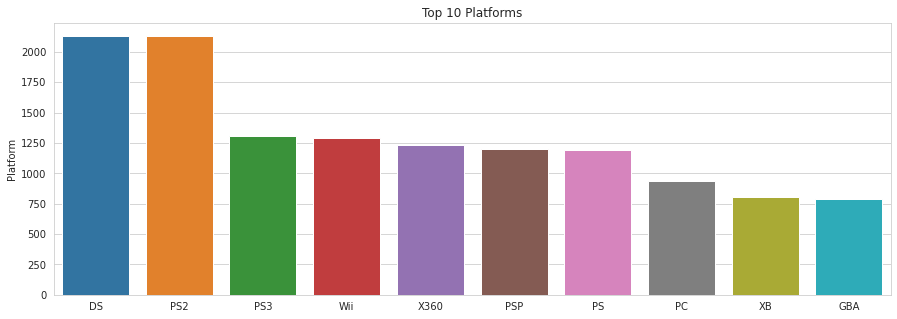

In [73]:
plt.title('Top 10 Platforms')
plt.xlabel = 'Platform'
plt.ylabel = 'Games Published'
sns.barplot(x = top_ten_platforms.index, y = top_ten_platforms);

Let us save and upload our work to Jovian before continuing

In [74]:
import jovian

In [75]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sagarpartap-che18/video-game-sales" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sagarpartap-che18/video-game-sales


'https://jovian.ai/sagarpartap-che18/video-game-sales'

## Asking and Answering Questions

We will try to figure out the top selling publisher, top selling games in different regions, top selling platform etc.



#### Q1: Which Publisher made most global Sales?

<AxesSubplot:xlabel='Genre', ylabel='Genre'>

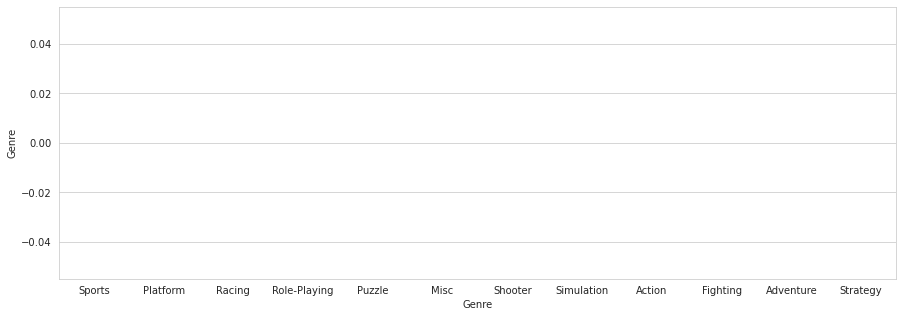

In [66]:
sns.barplot(x= videogames_df.Genre, y= videogames_df['Genre'].value_counts())

In [81]:
sales_by_publisher = videogames_df.groupby('Publisher')[['Global_Sales', 'NA_Sales']].sum()
## df.groupby function above take matching values from 'Publisher ' column and add corresponding values
## from 'Global_Sales' column
top_10_sellers = sales_by_publisher.sort_values( by = 'Global_Sales', ascending = False).head(10)
##df.sort_values sort the values for the fdataframe created above by groupby function.
top_10_sellers

,Global_Sales,NA_Sales
Publisher,,
Nintendo,1784.43,815.75
Electronic Arts,1093.39,584.22
Activision,721.41,426.01
Sony Computer Entertainment,607.28,265.22
Ubisoft,473.54,252.81
Take-Two Interactive,399.30,220.47
THQ,340.44,208.60
Konami Digital Entertainment,278.56,88.91
Sega,270.70,108.78


### Seems like Nintendo made most sales over the years but it didn't published most games.

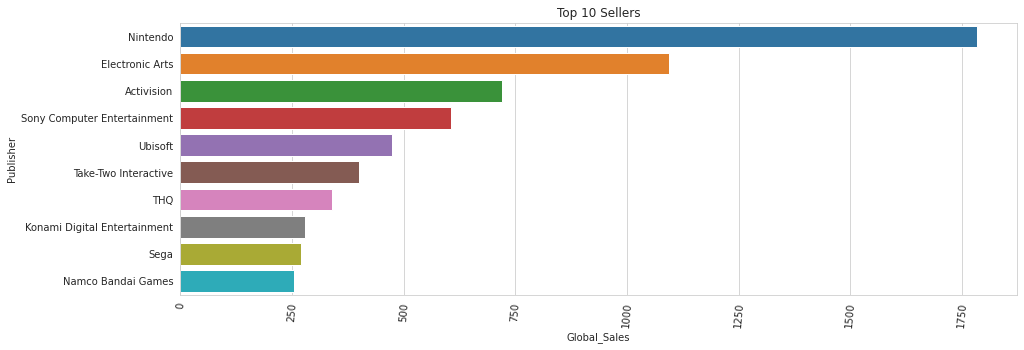

In [82]:
plt.title('Top 10 Sellers') #Plot title
plt.xticks(rotation = 85)   # Rotate the x labels so they don't coincide
plt.xlabel = ('Publisher')
plt.ylabel = ('Global Sales')
sns.barplot(x = top_10_sellers.Global_Sales, y = top_10_sellers.index);

###  Q2 What is the relationship between NA Sales and Global sales for top 50 sellers

In [124]:
videogames_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [131]:
top_50_sellers = sales_by_publisher.sort_values(by = 'Global_Sales', ascending = False).head(50)
top_50_sellers

,Global_Sales,NA_Sales
Publisher,,
Nintendo,1784.43,815.75
Electronic Arts,1093.39,584.22
Activision,721.41,426.01
Sony Computer Entertainment,607.28,265.22
Ubisoft,473.54,252.81
Take-Two Interactive,399.30,220.47
THQ,340.44,208.60
Konami Digital Entertainment,278.56,88.91
Sega,270.70,108.78


<AxesSubplot:xlabel='Global_Sales', ylabel='NA_Sales'>

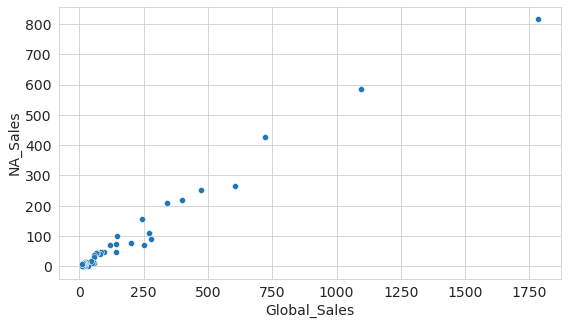

In [132]:
sns.scatterplot(x = top_50_sellers.Global_Sales, y= top_50_sellers.NA_Sales)

### We concluded that there is a direct relationship between NA sales and Global sales

#### Q3: Top  5 Selling games in NA, EU and Japan in 21st century?

In [83]:
desired_games = videogames_df[videogames_df['Year'] > 2000] # select games from year 2001 and above

In [84]:
#Top 5 games in NA by sales
##sum() is used because some games are released on multiple platforms
top_games_NA = desired_games.groupby('Name')[['NA_Sales']].sum()
top_5_NA = top_games_NA.sort_values(by = 'NA_Sales', ascending = False).head(5)
top_5_NA

,NA_Sales
Name,
Wii Sports,41.49
Grand Theft Auto V,23.46
Call of Duty: Black Ops,17.01
Mario Kart Wii,15.85
Wii Sports Resort,15.75


In [85]:
#Top 5 games in EU by sales
top_games_EU = desired_games.groupby('Name')[['EU_Sales']].sum()
top_5_EU = top_games_EU.sort_values(by = 'EU_Sales', ascending = False).head(5)
top_5_EU

,EU_Sales
Name,
Wii Sports,29.02
Grand Theft Auto V,23.04
Mario Kart Wii,12.88
FIFA 15,12.40
Call of Duty: Modern Warfare 3,11.29


In [86]:
#Top 5 games in NA by sales
top_games_JP = desired_games.groupby('Name')[['JP_Sales']].sum() 
top_5_JP = top_games_JP.sort_values(by = 'JP_Sales', ascending = False).head(5)
top_5_JP

,JP_Sales
Name,
New Super Mario Bros.,6.50
Pokemon Diamond/Pokemon Pearl,6.04
Pokemon Black/Pokemon White,5.65
Pokemon Ruby/Pokemon Sapphire,5.38
Animal Crossing: Wild World,5.33


#### Q4: Which 10 games that made more sales than 10 which were released on most platforms?

In [87]:
#Select games which made more sales than 10. 
games_of_interest = videogames_df[videogames_df['Global_Sales'] > 10]
games_of_interest

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
57,58,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55
58,59,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49
59,60,Super Mario 64,DS,2004.0,Platform,Nintendo,5.08,3.11,1.25,0.98,10.42
60,61,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.26


In [88]:
games_by_platform = games_of_interest.groupby('Name')[['Platform']].count()
platform_count_per_game = games_by_platform.sort_values(by = 'Platform',ascending = False).head(10)
platform_count_per_game

,Platform
Name,
Grand Theft Auto V,3
Call of Duty: Black Ops II,2
Super Mario 64,2
Call of Duty: Modern Warfare 2,2
Grand Theft Auto IV,2
Call of Duty: Black Ops,2
Call of Duty: Modern Warfare 3,2
Pokemon Omega Ruby/Pokemon Alpha Sapphire,1
Pokemon Red/Pokemon Blue,1


#### Q5: Which platforms made most Sales in each region?

In [141]:
sales_by_platform = videogames_df.groupby('Platform')[['Global_Sales']].sum()
top_platforms = sales_by_platform.sort_values(by = 'Global_Sales', ascending = False).head(10)
top_platforms

,Global_Sales
Platform,
PS2,1233.46
X360,969.60
PS3,949.35
Wii,909.81
DS,818.91
PS,727.39
GBA,305.62
PSP,291.71
PS4,278.10


In [89]:
sales_by_platform_EU = videogames_df.groupby('Platform')[['EU_Sales']].sum()
top_platforms_EU = sales_by_platform_EU.sort_values(by = 'EU_Sales', ascending = False).head(10)
top_platforms_EU

,EU_Sales
Platform,
PS3,340.47
PS2,332.63
X360,278.00
Wii,264.35
PS,212.38
DS,194.05
PC,137.35
PS4,123.70
GBA,72.49


In [90]:
sales_by_platform_NA = videogames_df.groupby('Platform')[['NA_Sales']].sum()
top_platforms_NA = sales_by_platform_NA.sort_values(by = 'NA_Sales', ascending = False).head(10)
top_platforms_NA

,NA_Sales
Platform,
X360,594.33
PS2,572.92
Wii,497.37
PS3,388.90
DS,388.53
PS,334.71
XB,182.06
GBA,178.43
N64,138.91


In [92]:
sales_by_platform_JP = videogames_df.groupby('Platform')[['JP_Sales']].sum()
top_platforms_JP = sales_by_platform_JP.sort_values(by = 'JP_Sales', ascending = False).head(10)
top_platforms_JP

,JP_Sales
Platform,
DS,175.02
PS,139.78
PS2,137.54
SNES,116.55
NES,98.65
3DS,97.30
GB,85.12
PS3,79.21
PSP,75.89


#### Q6: Genre popularity among PC and PS3 users

In [93]:
PC_games = videogames_df[videogames_df['Platform'] == 'PC']
PS3_games = videogames_df[videogames_df['Platform'] == 'PS3']

In [94]:
genre_pc = PC_games['Genre'].value_counts()
genre_pc.head(10)

Strategy        184
Action          161
Shooter         145
Simulation      112
Role-Playing    103
Adventure        65
Racing           56
Sports           49
Puzzle           25
Misc             22
Name: Genre, dtype: int64

### Strategy genre is most popular among PC users

In [95]:
genre_ps3 = PS3_games['Genre'].value_counts()
genre_ps3.head(10)

Action          373
Sports          210
Shooter         155
Misc            121
Role-Playing    117
Racing           90
Fighting         76
Adventure        72
Platform         36
Simulation       30
Name: Genre, dtype: int64

Let us save and upload our work to Jovian before continuing.

### Action genre is most popular among PS3users

In [96]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Inferences and Conclusion

* Nintendo is the most selling publisher
* Gamers on different platforms tend to like different genres
* Gamers in Japan have different taste in gaming as compared to NA and EU.
* While Xbox is popular in NA and EU, it is not the favored console in Japan
* Most games are sold in NA
* Most games were published around year 2010
* Action genre is most popular among PS3users
* Strategy genre is most popular among PC users

In [153]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## References and Future Work

- www.stackoverflow.com
- www.towardsdatascience.com

In [56]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
